## **Importing Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Necessary Modules**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

##**Importing Dataset**

In [4]:
risk_factor_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oishee apu/data.csv")
risk_factor_df.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
risk_factor_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


**Visualizing Dataset Information**

In [ ]:
risk_factor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

##**Missing Data Count in Each Collumn**

In [ ]:
missing_data_count = (risk_factor_df == "?").sum()

print("Missing Data Count for Each Column:")
print(missing_data_count)

Missing Data Count for Each Column:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**Data Cleaning**

***As we can see so many column have missing value but as "STDs: Time since first diagnosis" and "STDs: Time since last diagnosis" have most of the value missing we can be sure that this two column will no impact identifying any risk factor***

**Droping two columns**

In [ ]:
risk_factor_df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

In [ ]:
risk_factor_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


**Lokking for all existing columns**

In [ ]:
risk_factor_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

**Seperating the nemerical and categorical columns**

In [ ]:
categorical_columns = risk_factor_df.select_dtypes(include=['object']).columns
numerical_columns = risk_factor_df.select_dtypes(exclude=['object']).columns

print("Numerical columns:")
for col in numerical_columns:
    print(col)

print("\nCategorical columns:")
for col in categorical_columns:
    print(col)

Numerical columns:
Age
STDs: Number of diagnosis
Dx:Cancer
Dx:CIN
Dx:HPV
Dx
Hinselmann
Schiller
Citology
Biopsy

Categorical columns:
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives
Hormonal Contraceptives (years)
IUD
IUD (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:cervical condylomatosis
STDs:vaginal condylomatosis
STDs:vulvo-perineal condylomatosis
STDs:syphilis
STDs:pelvic inflammatory disease
STDs:genital herpes
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis B
STDs:HPV


**Seperating Neumerical and Categorical df**

In [ ]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS',
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN',
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

**Replacing ? with Nan**

In [ ]:
risk_factor_df = risk_factor_df.replace('?' , np.NaN)

**Filling the missing values of numeric data columns with mean of the column data**

In [ ]:
for feature in numerical_df:
    print(feature, '', risk_factor_df[feature].apply(pd.to_numeric, errors='coerce').mean())
    feature_mean = round(risk_factor_df[feature].apply(pd.to_numeric, errors='coerce').mean(), 1)
    risk_factor_df[feature] = risk_factor_df[feature].apply(pd.to_numeric, errors='coerce').fillna(feature_mean)

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.219721412585799
Smokes (packs/year)  0.4531439506492308
Hormonal Contraceptives (years)  2.2564192013893334
IUD (years)  0.5148043184885289
STDs (number)  0.17662682602921648


**Ensuring that non-numeric values are replaced with NaN, and then fills any remaining NaN values with 1.0.**

In [ ]:
for feature in categorical_df:
    risk_factor_df[feature] = pd.to_numeric(risk_factor_df[feature], errors='coerce').fillna(1.0)

In [ ]:
risk_factor_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
categorical_columns = risk_factor_df.select_dtypes(include=['object']).columns
numerical_columns = risk_factor_df.select_dtypes(exclude=['object']).columns

print("Numerical columns:")
for col in numerical_columns:
    print(col)

print("\nCategorical columns:")
for col in categorical_columns:
    print(col)

Numerical columns:
Age
Number of sexual partners
First sexual intercourse
Num of pregnancies
Smokes
Smokes (years)
Smokes (packs/year)
Hormonal Contraceptives
Hormonal Contraceptives (years)
IUD
IUD (years)
STDs
STDs (number)
STDs:condylomatosis
STDs:cervical condylomatosis
STDs:vaginal condylomatosis
STDs:vulvo-perineal condylomatosis
STDs:syphilis
STDs:pelvic inflammatory disease
STDs:genital herpes
STDs:molluscum contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis B
STDs:HPV
STDs: Number of diagnosis
Dx:Cancer
Dx:CIN
Dx:HPV
Dx
Hinselmann
Schiller
Citology
Biopsy

Categorical columns:


##**Exploratory Data Analysis**

**Heatmap of the correlation matrix**

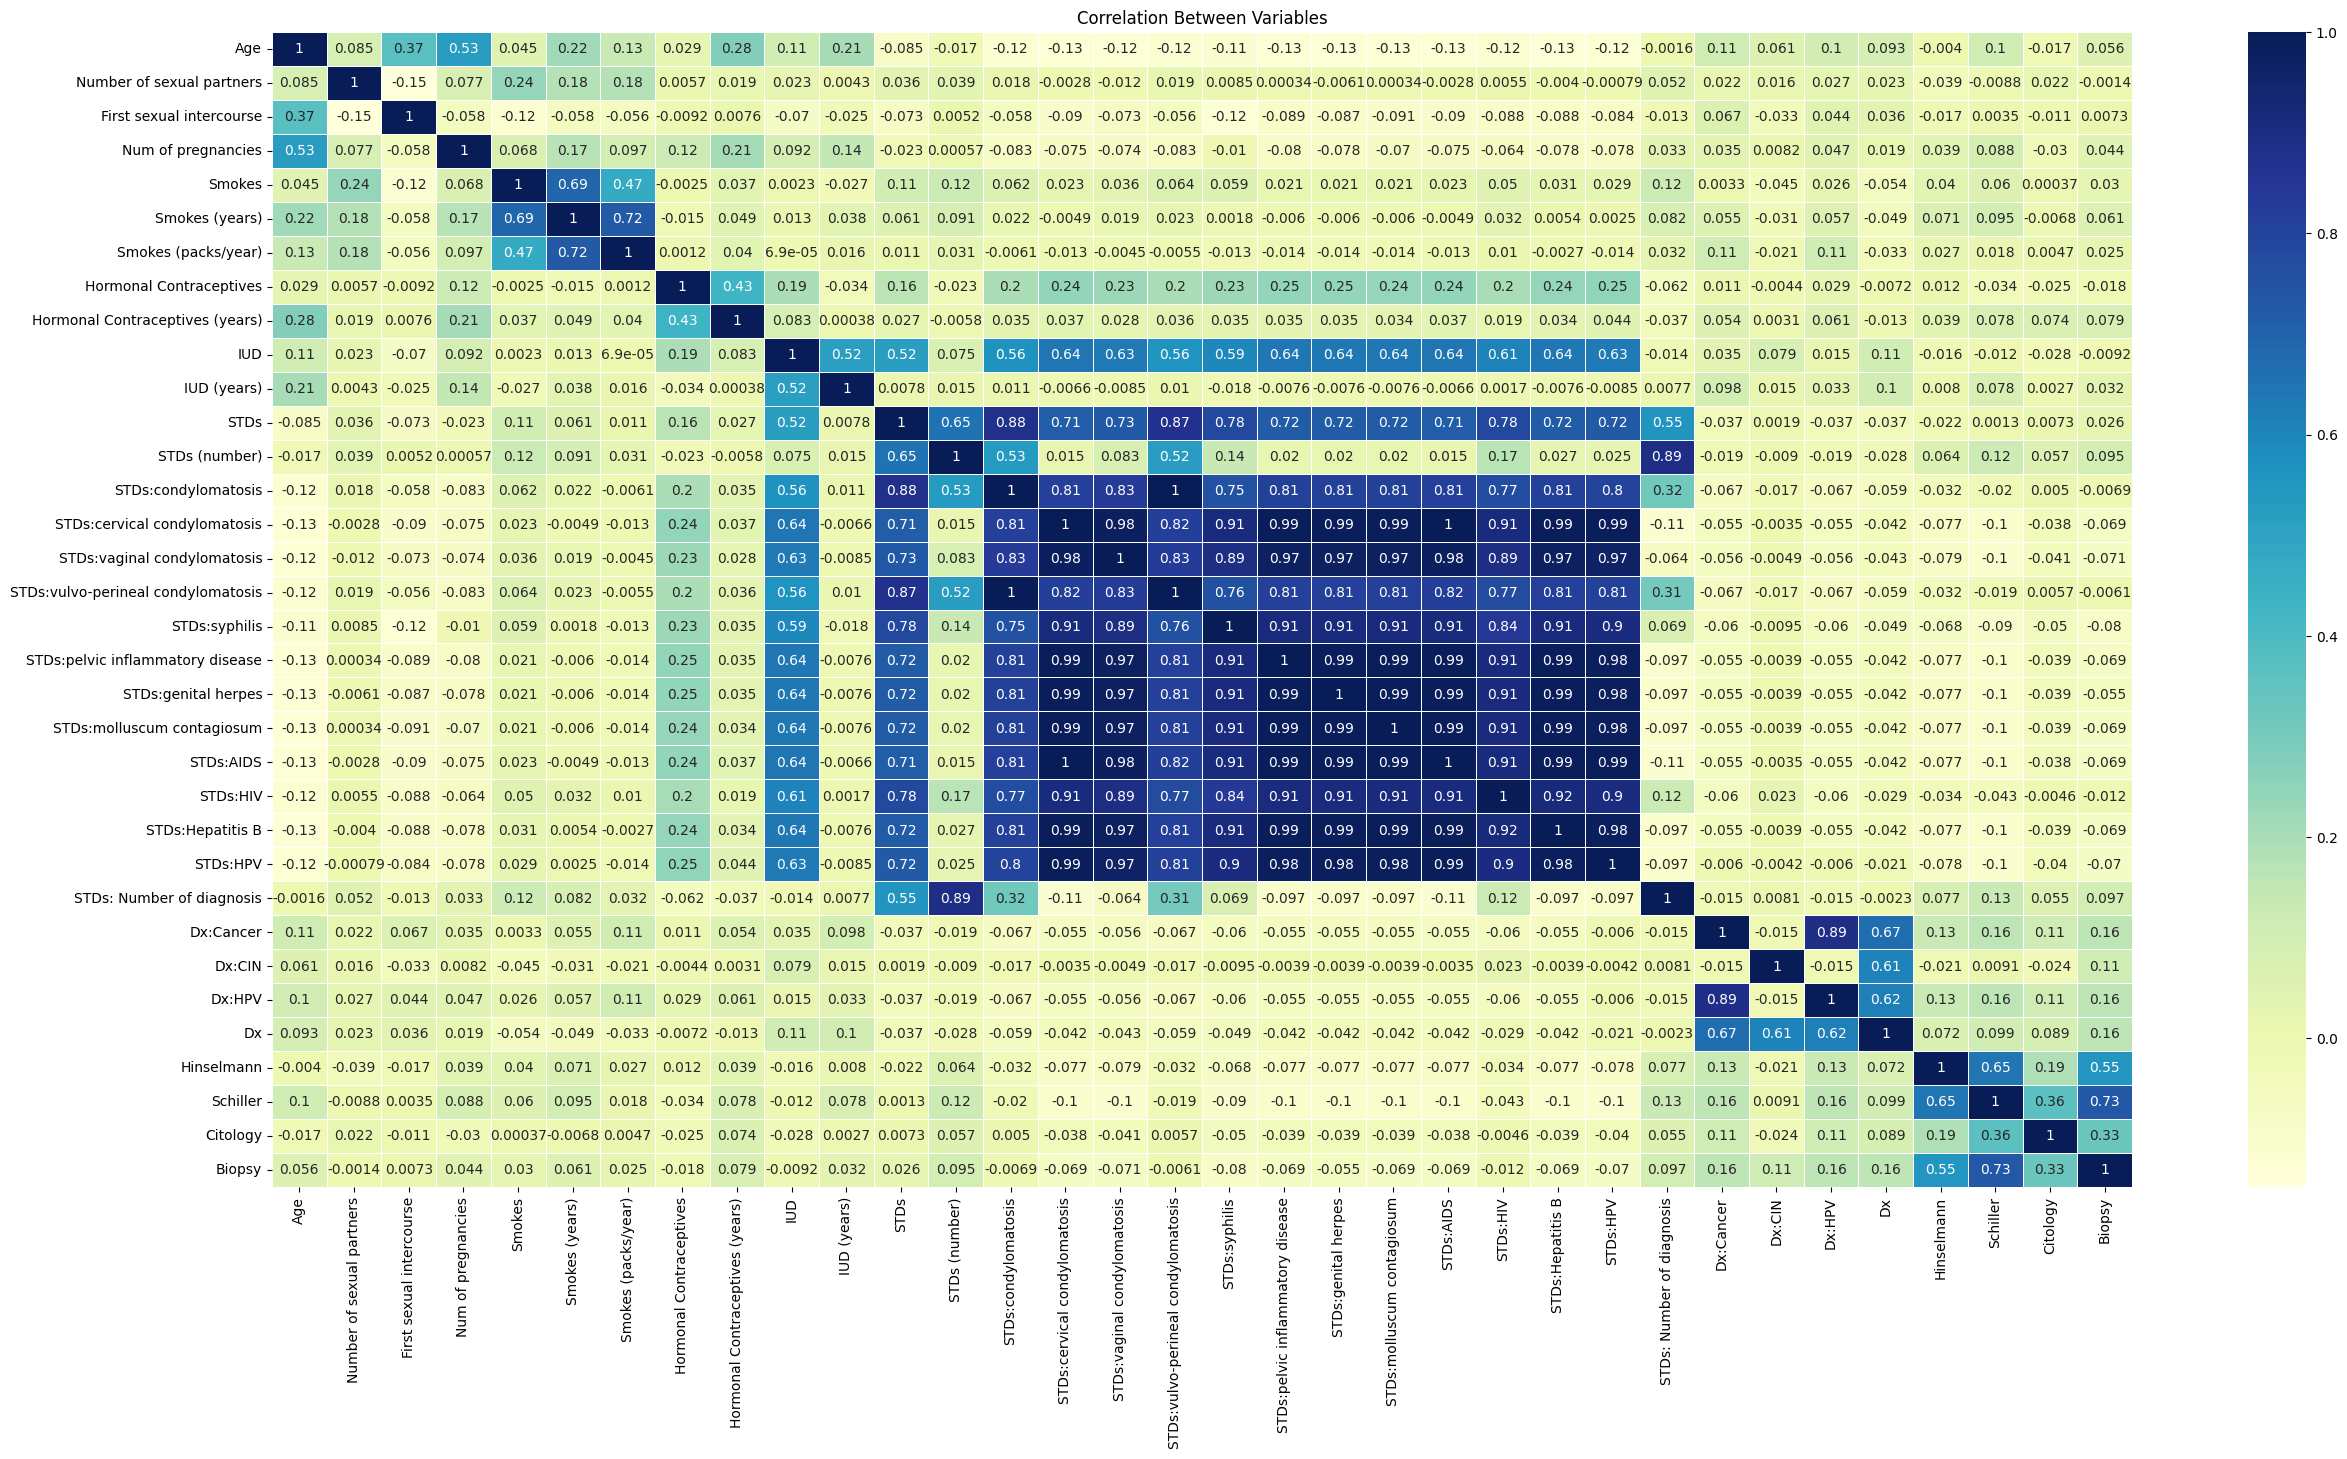

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(risk_factor_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Between Variables")
plt.show()

**Visualizing class outliers**

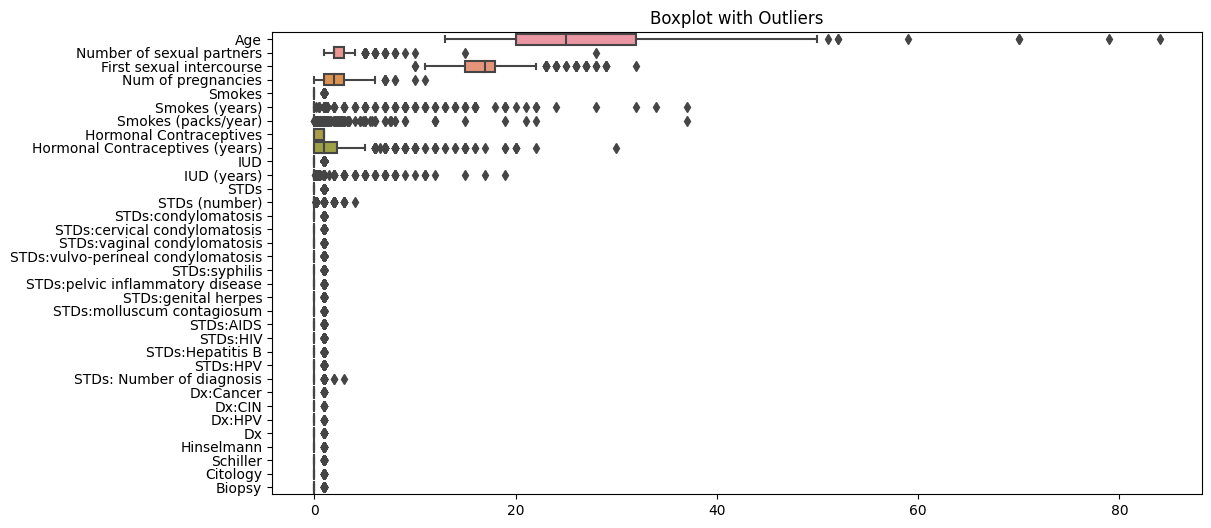

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=risk_factor_df, orient="h", showfliers=True)
plt.title("Boxplot with Outliers")
plt.show()

**Visualizing class attiribute counts of all categorical columns**

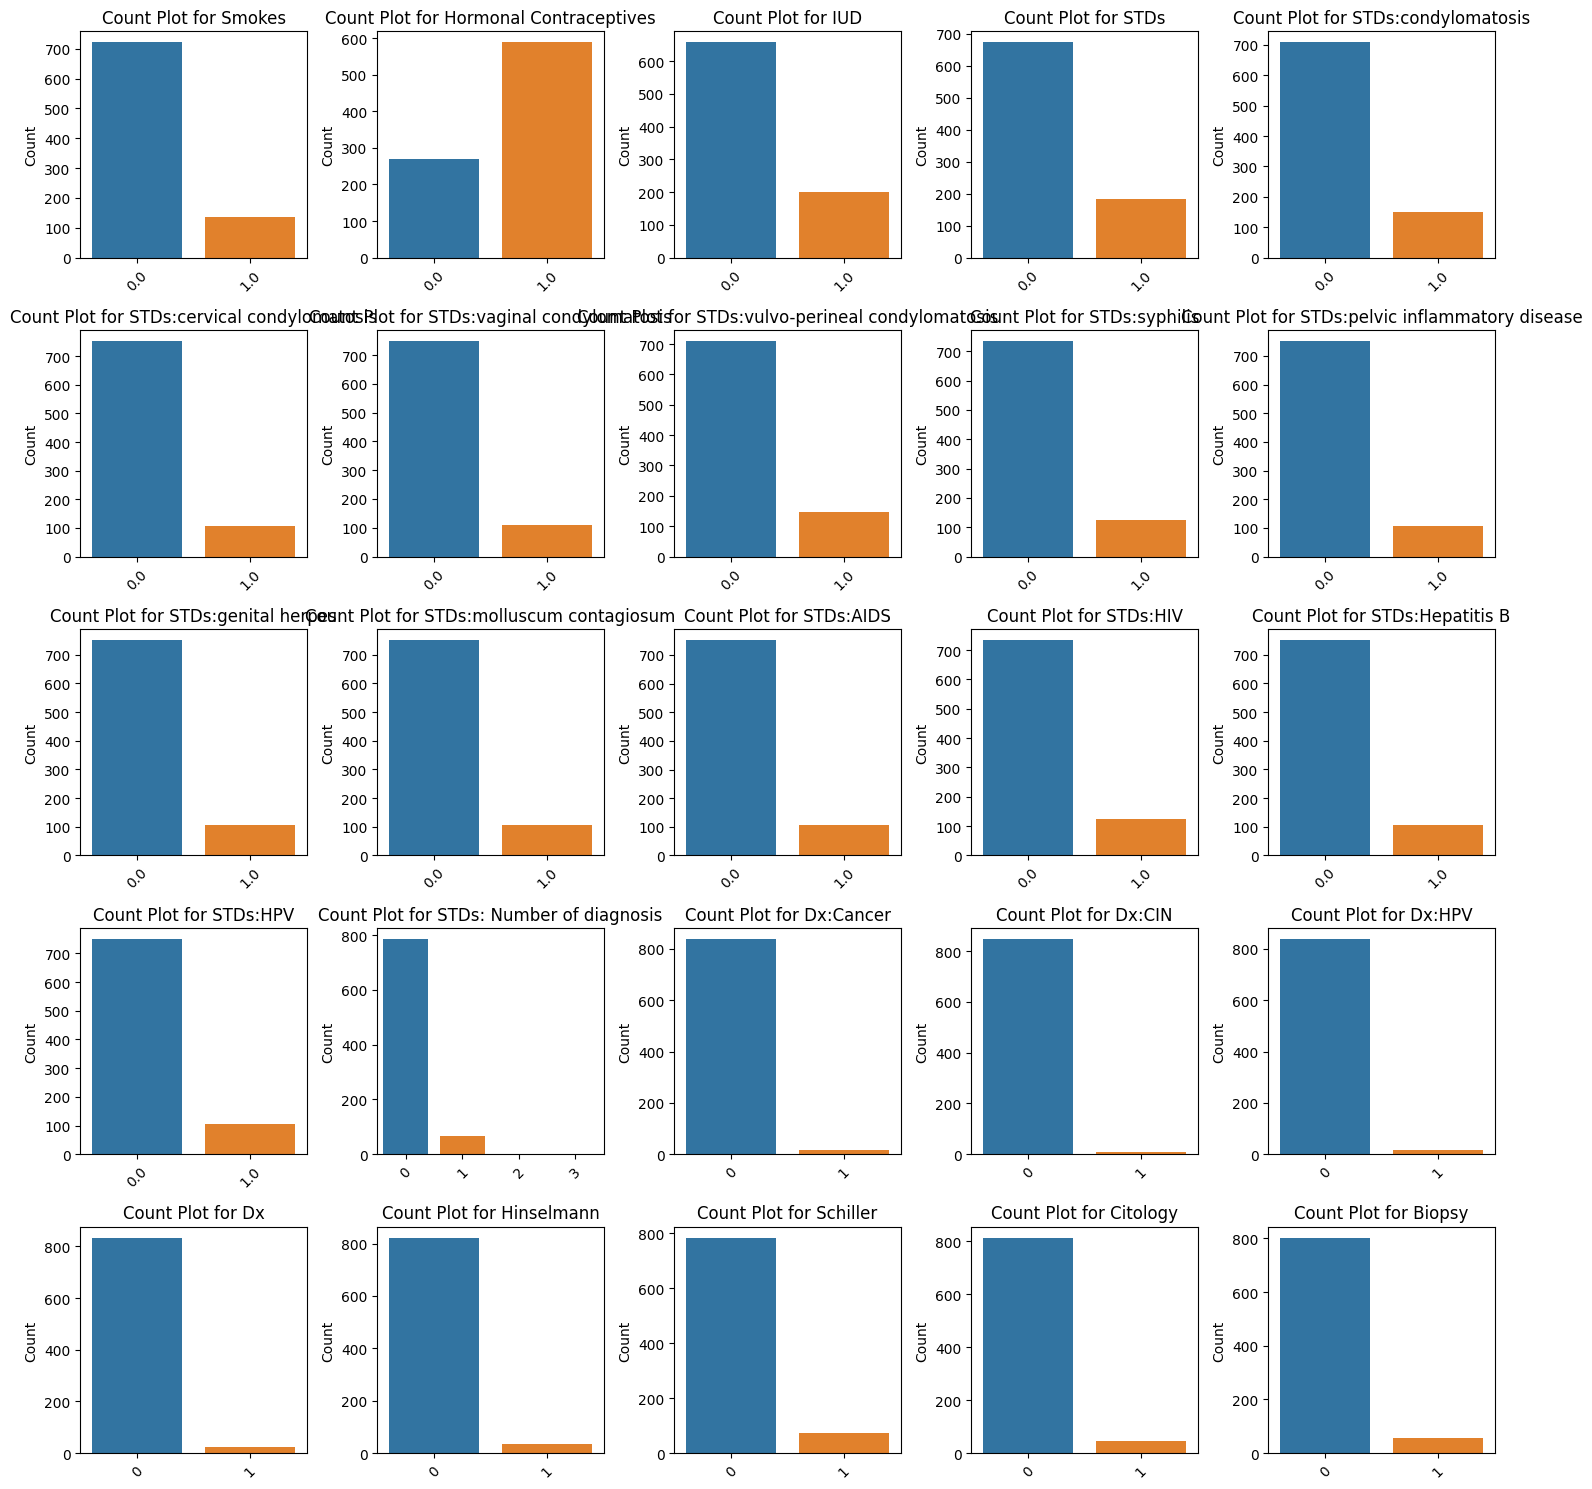

In [ ]:
num_plots = len(categorical_df)
num_cols = 5

num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, feature in enumerate(categorical_df):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    sns.countplot(x=feature, data=risk_factor_df, ax=ax)
    ax.set_title(f'Count Plot for {feature}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel(None)
    ax.set_ylabel('Count')

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

**Mean age of women facing the risk of cervical cancer**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean age of the Women facing the risk of Cervical cancer 26.82051282051282


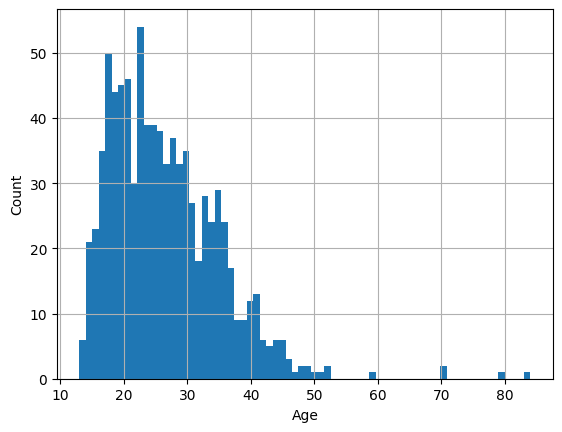

In [ ]:
risk_factor_df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
print('Mean age of the Women facing the risk of Cervical cancer',risk_factor_df['Age'].mean())

In [ ]:
mean_age = risk_factor_df['Age'].mean()
print('Mean age of the Women facing the risk of Cervical cancer:', mean_age)

Mean age of the Women facing the risk of Cervical cancer: 26.82051282051282


***From the above plots it can be seen that the mean age of the women facing the risk of cervicakl cancer is 26. Also the women with the age in range of 20 to 35 have the highest chances of developing the risk of cervical cancer***

<ipython-input-117-60d68a21059d>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=risk_factor_df, x='Age', hue=feature, ax=ax, fill=True)


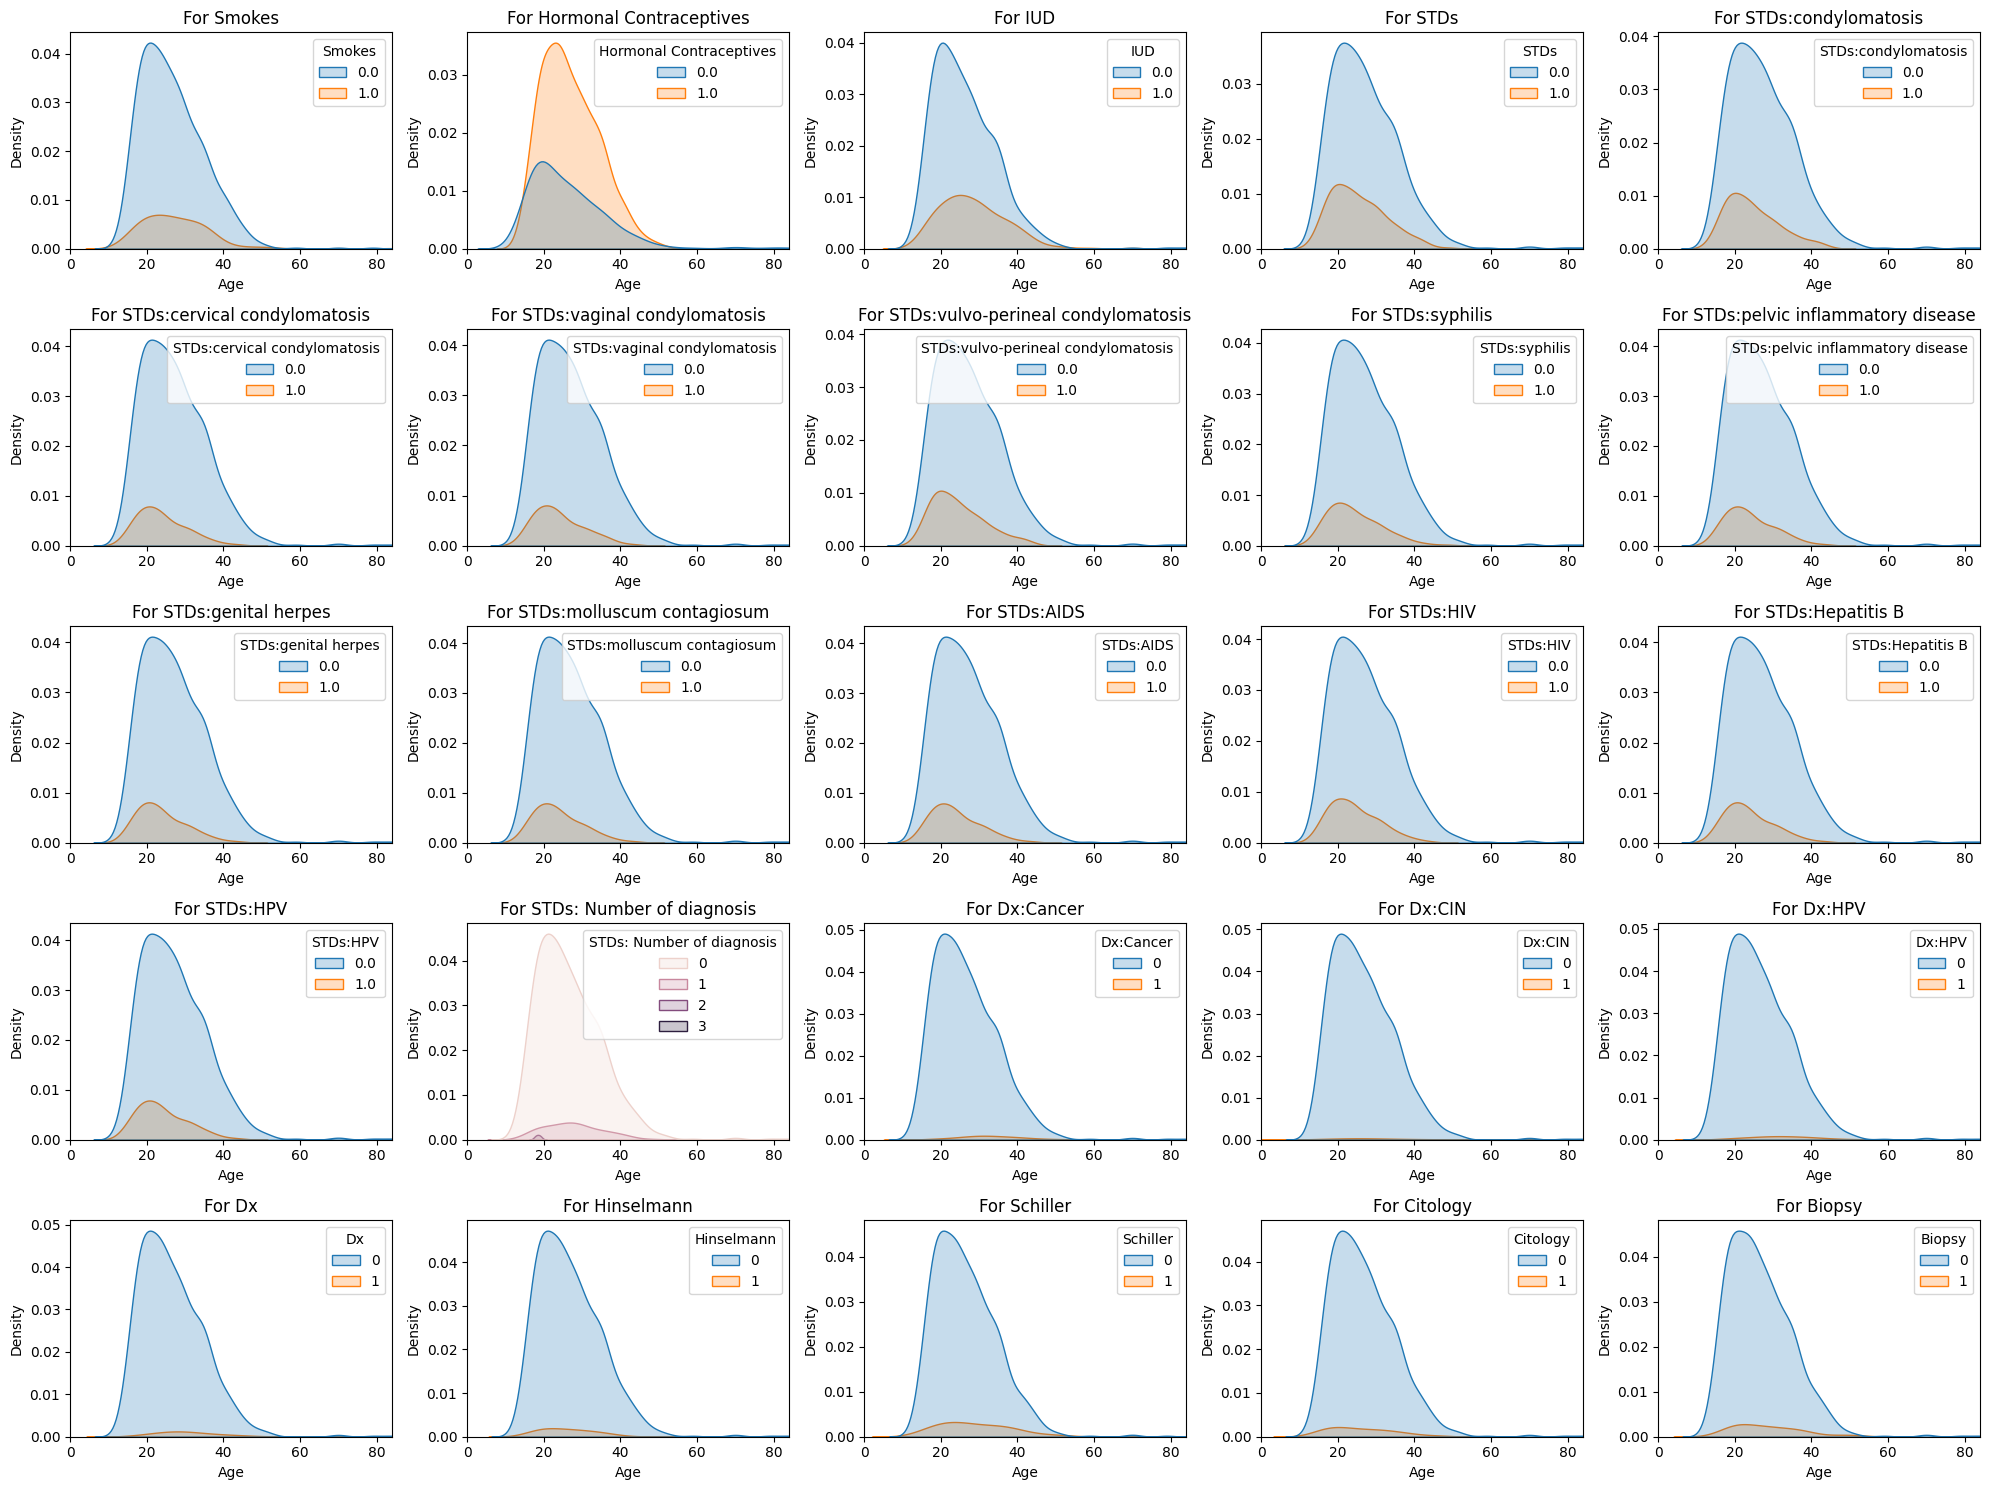

In [ ]:
num_cols = 5
num_rows = (len(categorical_df) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, feature in enumerate(categorical_df):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    try:
        sns.kdeplot(data=risk_factor_df, x='Age', hue=feature, ax=ax, fill=True)
        oldest = risk_factor_df['Age'].max()
        ax.set_xlim(0, oldest)
        ax.set_title(f'For {feature}')
        ax.set_xlabel('Age')
        ax.set_ylabel('Density')
    except UserWarning:
        pass

for i in range(len(categorical_df), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

***As age of women increases, the number of sexual partners increases which increases the possibility of getting tumor. So we can consider that Number of Sexual partners as a key feature in detecting the Cervical Cance***

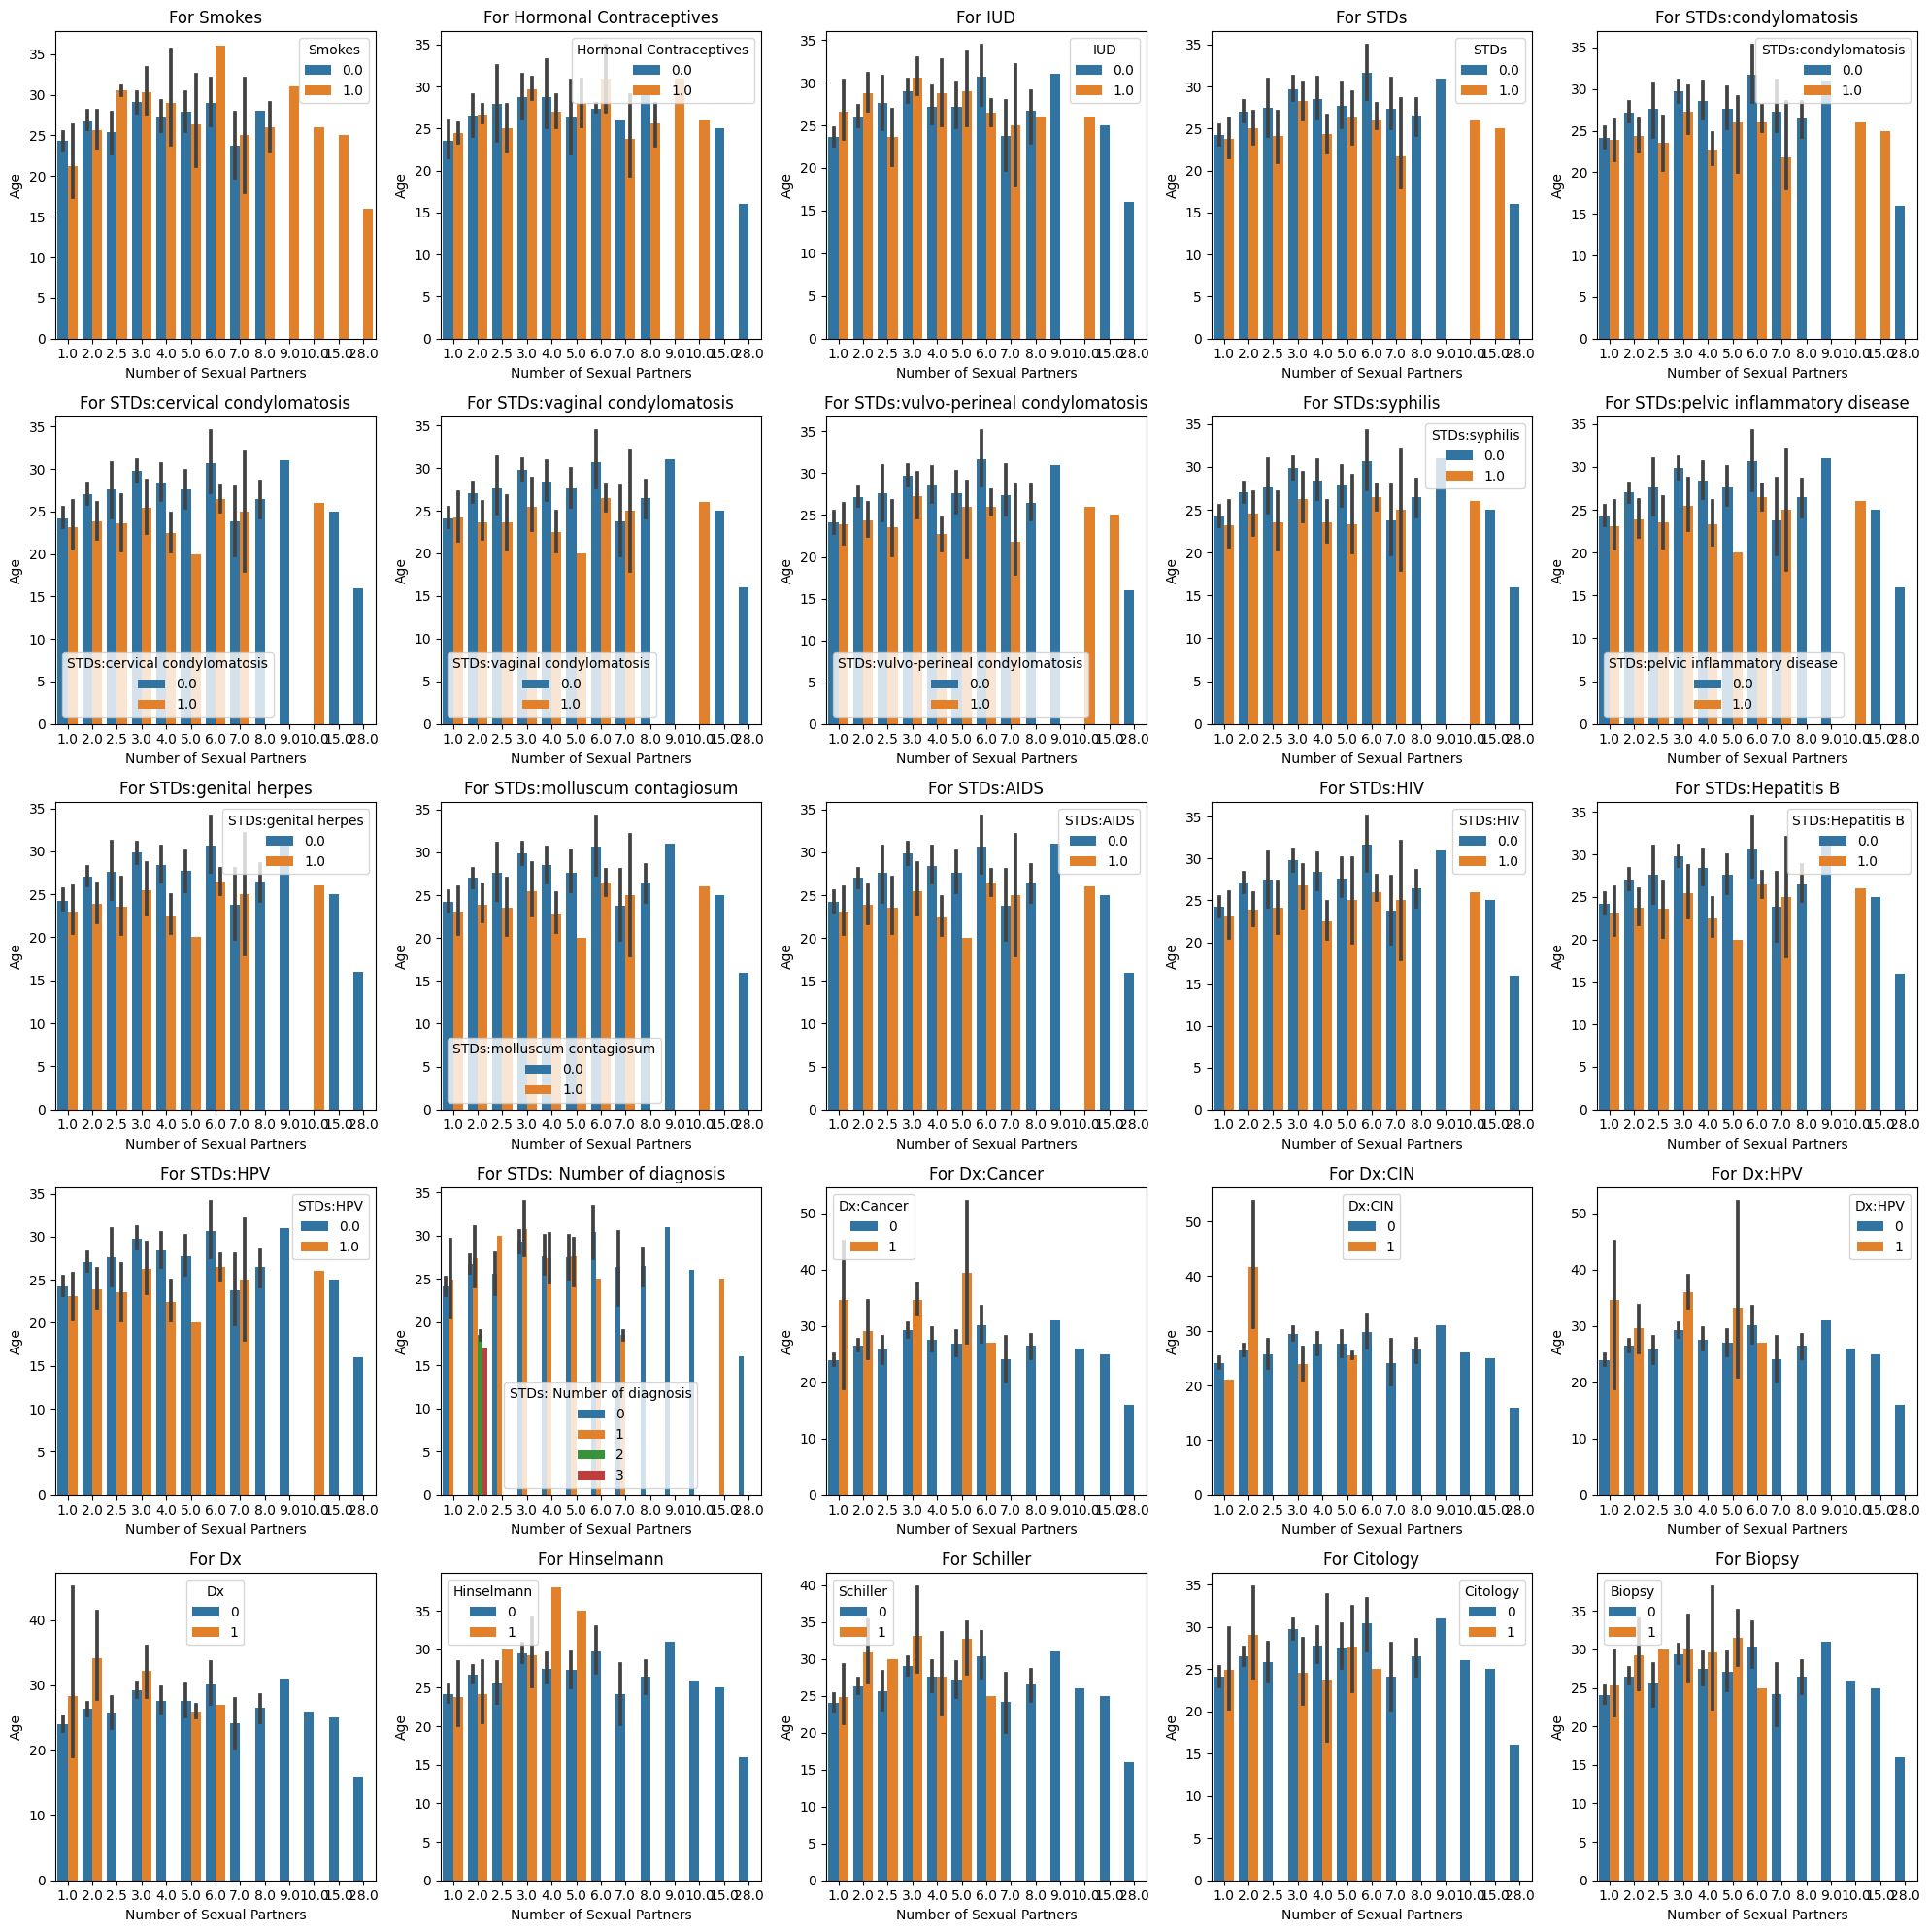

In [ ]:
num_cols = 5

num_rows = (len(categorical_df) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i, feature in enumerate(categorical_df):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    sns.barplot(x='Number of sexual partners', y='Age', hue=feature, data=risk_factor_df, ax=ax)
    ax.set_title(f'For {feature}')
    ax.set_xlabel('Number of Sexual Partners')
    ax.set_ylabel('Age')

for i in range(len(categorical_df), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])


plt.tight_layout()
plt.show()


***Most of the women started first sexual intercourse between the age 15 to 20***

<ipython-input-112-cb34df59492f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.to_numeric(risk_factor_df['First sexual intercourse'], errors='coerce'))


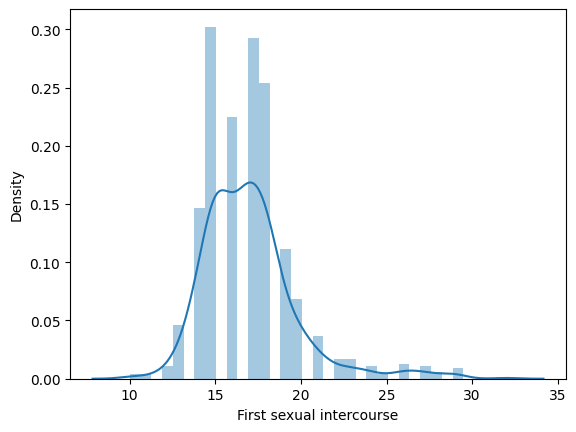

In [ ]:
sns.distplot(pd.to_numeric(risk_factor_df['First sexual intercourse'], errors='coerce'))
plt.show()

***The density plots shows that the women who started the Sexual intercourse at the age of 15 to 20 are having the high chances of risk***

<ipython-input-118-72d367bea176>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=risk_factor_df, x='First sexual intercourse', hue=feature, ax=ax, fill=True)


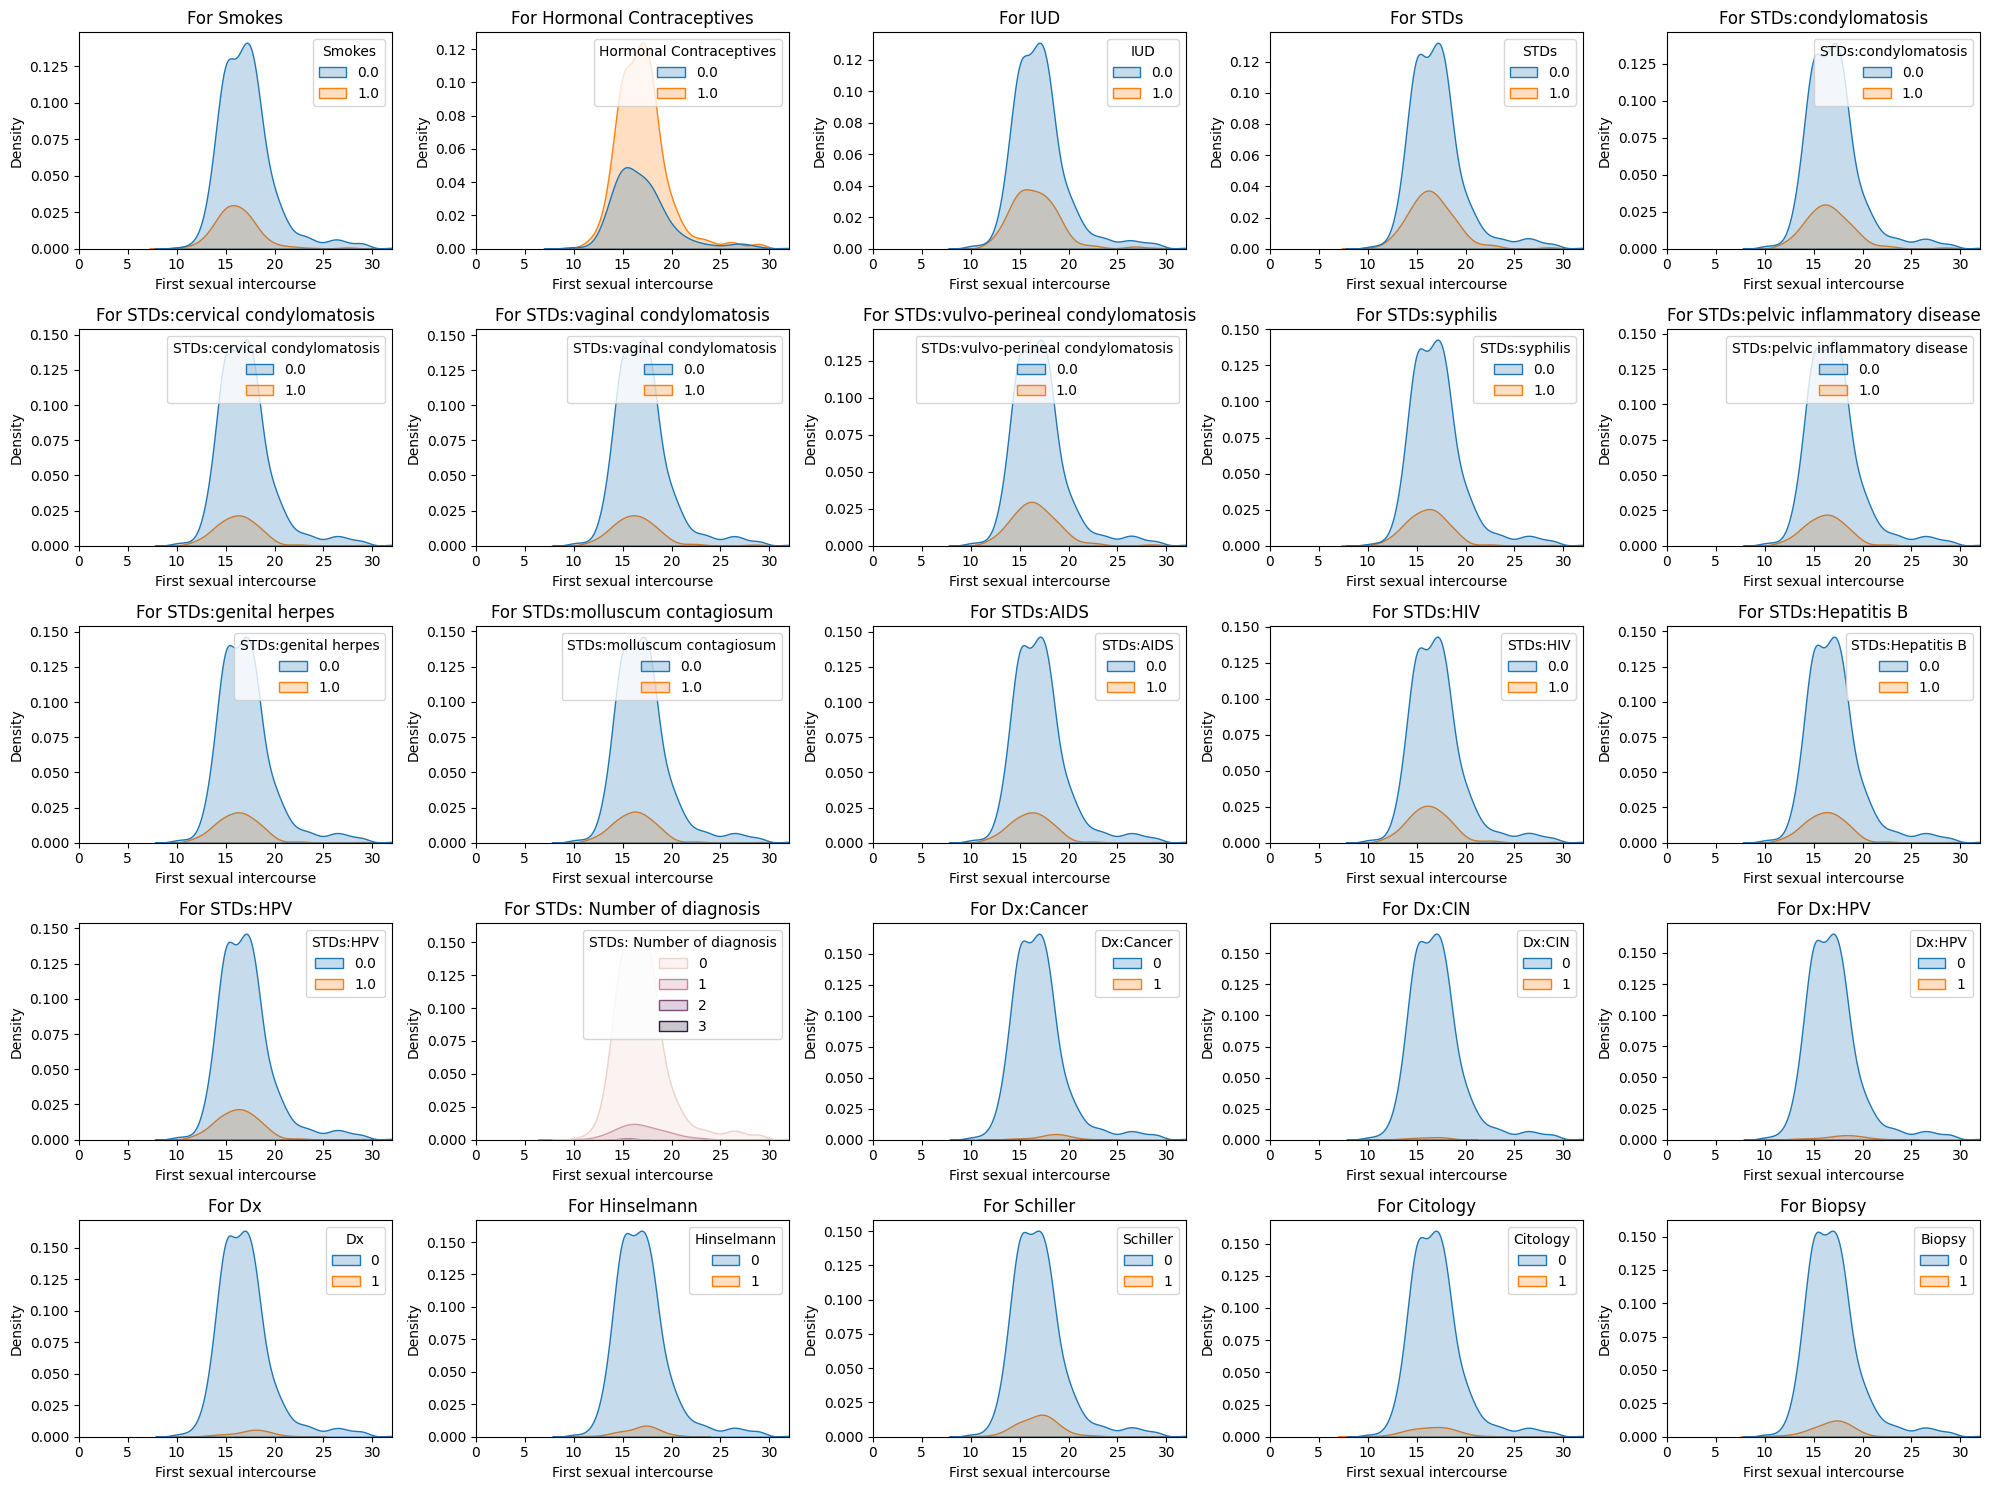

In [ ]:
num_cols = 5
num_rows = (len(categorical_df) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, feature in enumerate(categorical_df):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    try:
        sns.kdeplot(data=risk_facor_df, x='First sexual intercourse', hue=feature, ax=ax, fill=True)
        oldest = risk_factor_df['First sexual intercourse'].max()
        ax.set_xlim(0, oldest)
        ax.set_title(f'For {feature}')
        ax.set_xlabel('First sexual intercourse')
        ax.set_ylabel('Density')
    except UserWarning:
        pass

for i in range(len(categorical_df), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()